# 1d analysis with `pandas`

The emphasis in this assignment is reading data in with `pandas` and doing some typical analysis. Each problem also requires a plot and as such the plot should be clean and clear.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import *



### 1. `groupby`

Use the data from the Merrimack River again, but this time focus on one part of it: the mean of river discharge over all of the years of data (the black line).

Read in the dataset using `pandas`, then use the `pandas` `groupby` functionality to calculate this average, then present a plot of it. Compare with the original figure to make sure you've gotten the line correct, but don't worry about matching the labels or other nice details of the plot.


![Merrimack River Discharge](data/merrimack_discharge.png)

The data used to create this plot can be found in the `data` directory and is called `merrimack_discharge.dat`.

---

Grading rubric [5 points]:

* [2 pts] Read in data using `pandas` in a reasonable way
* [2 pts] Use `groupby` correctly to make plot
* [1 pt] Plot line

(366,)

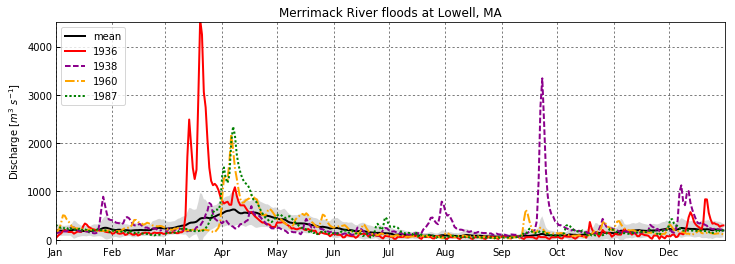

In [2]:
# YOUR CODE HERE
from datetime import datetime, date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# import seaborn as sns

pd.set_option('max_rows',6)

url = '../hw5_ocng669/merrimack_discharge.dat'
dfs=pd.read_table(url, skiprows=[24], header=23, delim_whitespace=True, parse_dates=[2], index_col=2)

dfs.loc[:, 'month'] = dfs.index.month
dfs.loc[:, 'day'] = dfs.index.day
discharge=np.array(dfs['dv_va'])*(0.3048**3)
index = pd.MultiIndex.from_tuples(list(zip(dfs.index.month,dfs.index.day)), names=['month', 'day'])
df = pd.DataFrame({'discharge':discharge,
                  'month':np.array(dfs['month']),
                  'day':np.array(dfs['day']),
                  'datetime':np.array(dfs.index)},index=index)
# can we just divided index into two?????????
grouped = df.groupby(['month', 'day'])
mean=np.array(grouped.mean())
std=np.array(grouped.agg([np.std]))
# .plot(color='k', grid=True, figsize=(14, 4), lw=3)

df2=df.set_index('datetime')

# #one day to do it
# d19360=np.array(df2.loc['1936']['discharge'])
# d1936=np.delete(d19360,59,0)
# d1938=np.array(df2.loc['1938']['discharge'])
# d19600=np.array(df2.loc['1960']['discharge'])
# d1960=np.delete(d19600,59,0)
# d1987=np.array(df2.loc['1987']['discharge'])
# fouryearm0=np.mean([d1936,d1938,d1960,d1987],axis=0)  # 365 day mean
# Feb29m=np.mean([d19360[59],d19600[59]],axis=0)        # add Feb 29 
# fouryearm=np.insert(fouryearm0, 59, Feb29m, axis=0)

d1936=np.array(df2.loc['1936']['discharge'])
d19380=np.array(df2.loc['1938']['discharge'])
d1938=np.insert(d19380, 59, np.nan, axis=0)           # expand 356 days to 366 days
d1960=np.array(df2.loc['1960']['discharge'])
d19870=np.array(df2.loc['1987']['discharge'])
d1987=np.insert(d19870, 59, np.nan, axis=0)
fouryearm=np.mean([d1936,d1938,d1960,d1987],axis=0)
np.shape(fouryearm)
x = np.array(dfs['1936'].index)

# draw pics 
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 1, 1)

plt.yticks([0, 1000, 2000, 3000, 4000])
ax.set_ylim(0, 4500)
ax.get_yaxis().set_tick_params(direction='in',width=1)

array_disc = x[dfs['1936'].index.day ==1]
ax.set_xlim(datetime(1936,1,1),datetime(1937,1,1))
plt.xticks(array_disc)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_title('Merrimack River floods at Lowell, MA')
ax.set_ylabel('Discharge [$m^3$'+' '+'$s^{-1}$]')

ax.plot(x,mean,linestyle=  '-', color='black', label='mean', linewidth=2)
ax.plot(x,d1936,linestyle= '-', color='red', label='1936', linewidth=2)
ax.plot(x,d1938,linestyle= '--', color='darkmagenta', label='1938', linewidth=2)
ax.plot(x,d1960,linestyle= '-.', color='orange', label='1960', linewidth=2)
ax.plot(x,d1987,linestyle= 'dotted', color='green', label='1987', linewidth=2)
ax.fill_between(x,mean[:,0]+std[:,0],mean[:,0]-std[:,0],facecolor='grey',alpha=0.3)
ax.legend(loc='upper left')

ax.grid(True, color='k', linestyle=':', linewidth=0.5)
np.shape(std[:,0])

### 2. Running mean and resampling

#### A. Running mean
Read in temperature data from Mauna Loa, Hawaii. You can read it into `pandas` directly from online with a line that starts with

>  pd.read_table('http://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt' ...

then you should choose keyword arguments carefully to be able to use time as your index, have proper column names, and have the data parsed properly. You may need to use the `delim_whitespace=True` input keyword argument to have it read in properly. Also, if there are values missing in a dataset you are trying to read in, you can use the `na_values` keyword argument to replace the values with NaN which will allow you to use the time series more effectively.

The data have three columns, the first is the year, the second is the average global temperature, the third is a 5-year running mean of the global average temperature. You should rename your columns with sensible names.

Reproduce the rolling mean using `pandas`. Get your calculation of the running mean and the one from the data file to match exactly, and show it in a plot that overlays the two together but makes them both visible.

---

Grading rubric [5 points]:

* [2 pts] Read in data using `pandas` in a reasonable way
* [2 pts] Calculate rolling mean correctly
* [1 pt] Plot lines


/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()


(366,)

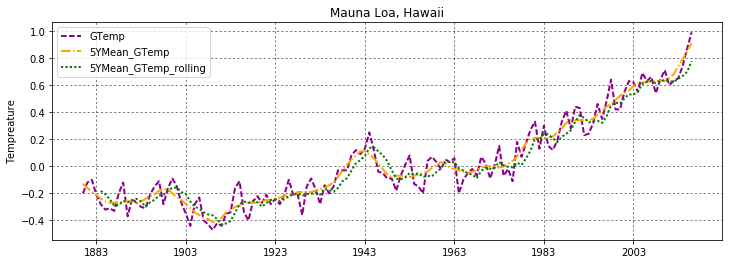

In [3]:
# YOUR CODE HERE
dfs=pd.read_table('http://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt',
              delim_whitespace=True, parse_dates=[0], index_col=0, header=None)
dfs.columns = ["GTemp", "5YMean_GTemp"]
dfs.index.name = 'Year'
dfs.loc[:,'5YMean_GTemp_rolling']=pd.rolling_mean(dfs['GTemp'], 5, min_periods=None, freq=None, center=False)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

ax.set_title('Mauna Loa, Hawaii')
ax.set_ylabel('Tempreature')

ax.plot(dfs.index,dfs['GTemp'],linestyle= '--', color='darkmagenta', label='GTemp', linewidth=2)
ax.plot(dfs.index,dfs['5YMean_GTemp'],linestyle= '-.', color='orange', label='5YMean_GTemp', linewidth=2)
ax.plot(dfs.index,dfs['5YMean_GTemp_rolling'],linestyle= 'dotted', color='green', label='5YMean_GTemp_rolling', linewidth=2)
ax.legend(loc='upper left')

ax.grid(True, color='k', linestyle=':', linewidth=0.5)
np.shape(std[:,0])



#### B. Resampling

Read in a dataset of carbon dioxide measurements from Mauna Loa, Hawaii, to go with the temperature data from Part A of this question. You can again read in the data directly from the internet, and use the following line as the start of this call – you fill in the input keyword arguments (you may need to use the `delim_whitespace=True` input keyword argument for the datasets to have it read in properly):

> pd.read_table('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt' ...

Plot the CO$_2$ and temperature measurements on the same plot, 1 to 1. That is, make a `scatter` plot of CO$_2$ vs. temperature with CO$_2$ on the x-axis as the independent variable, and temperature plotted against it on the y-axis. To do this, you need to have the same number of data points. Upsample the temperature data to match the CO$_2$ data timing and fill in with reasonable values to plot against the monthly CO$_2$ data. Plot them together for the range of times that are included in both datasets. On your `scatter` plot, color the markers with time to show how time is passing in the data markers, but don't worry about the colorbar and colorbar labels. Since you are probably going to end up plotting two different dataframes together, feel free to use `matplotlib` directly to make this plot, instead of trying to use `pandas` built-in plotting.

---

Grading rubric [5 points]:

* [2 pts] Read in data using `pandas` in a reasonable way
* [2 pts] Resample and fill-in data properly
* [1 pt] Make scatter plot, colored with time, for the correct time range


/opt/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4683: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


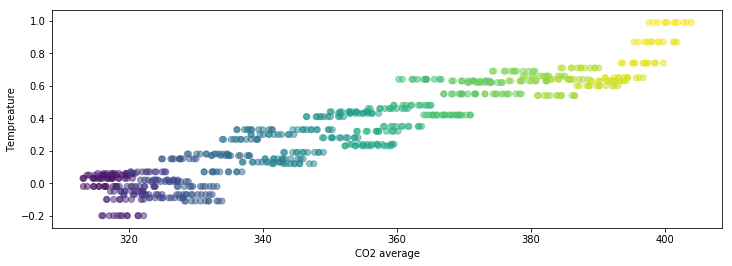

In [4]:
# YOUR CODE HERE
dfs2=pd.read_table('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt',comment='#',
              delim_whitespace=True, parse_dates=[0,1], index_col=[0], header=None)
dfs2.columns = ["month","decimal date","average","interpolated", "trend","#days"]
dfs2.index.name = "year"
dco2_avg=dfs2[:"2015-01-01"]['average']
dco2_avg[dco2_avg == -99.99] = np.nan
dtemp=dfs['1958':]['GTemp'].resample('m').bfill()[2:-1]
date=dfs2[:"2015-01-01"]['decimal date']
date2=np.array(date)
colors= (date2 - date2.min()) / (date2.max()-date2.min())


df4 = pd.DataFrame({'dco2_avg':dco2_avg,
                  'dtemp':np.array(dtemp),
                  'date':np.array(date),'colors':colors}).set_index('dco2_avg')


fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
ax.set_xlabel('CO2 average')
ax.set_ylabel('Tempreature')


ax.scatter(np.array(df4.index),np.array(df4['dtemp']),c=colors, alpha=0.5)
